<a href="https://colab.research.google.com/github/Hargenx/Exemplo_Hadoop/blob/main/HadoopExemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalação do Hadoop

O Hadoop é um framework de programação baseado em Java que suporta o processamento e armazenamento de conjuntos de dados extremamente grandes em um cluster de máquinas baratas. Foi o primeiro grande projeto de código aberto no campo de big data e é patrocinado pela Apache Software Foundation.

- Download do Hadoop:
  - Baixa o arquivo tar.gz do Hadoop versão 3.3.6 do site oficial da Apache.
  -  Utiliza o comando wget para realizar o download.

In [1]:
!wget https://downloads.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz

--2024-03-13 10:03:15--  https://downloads.apache.org/hadoop/common/hadoop-3.3.6/hadoop-3.3.6.tar.gz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.208.237, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730107476 (696M) [application/x-gzip]
Saving to: ‘hadoop-3.3.6.tar.gz’

hadoop-3.3.6.tar.gz 100%[===================>] 696.28M  22.7MB/s    in 31s     

2024-03-13 10:03:47 (22.3 MB/s) - ‘hadoop-3.3.6.tar.gz’ saved [730107476/730107476]



- Extração do Hadoop:

  - Usa o comando tar para extrair o conteúdo do arquivo tar.gz recém-baixado.
  - O comando específico é tar -xzvf hadoop-3.3.6.tar.gz.

vamos usar o comando tar com a opção -x para extrair, -z para descomprimir, -v para exibir informações detalhadas e -f para especificar que estamos extraindo de um arquivo.

In [2]:
!tar -xzvf hadoop-3.3.6.tar.gz

Streaming output truncated to the last 5000 lines.
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/BufferSizeParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/DeleteOpParam.Op.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/PutOpParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/RenameOptionSetParam.html
hadoop-3.3.6/share/doc/hadoop/hadoop-project-dist/hadoop-hdfs-client/build/source/hadoop-hdfs-project/hadoop-hdfs-client/target/api/org/apache/hadoop/hdfs/web/resources/XAttrEncodingParam.

cópia para /usr/local/:

Copia o diretório extraído do Hadoop para a pasta /usr/local/ usando o comando cp.

In [3]:
# copia o arquivo hadoop para user/local
!cp -r hadoop-3.3.6/ /usr/local/

# Configurando o Java Home do Hadoop
O Hadoop requer que você defina o caminho para o Java, seja como uma variável de ambiente ou no arquivo de configuração do Hadoop.

- Configuração do Java Home para o Hadoop:

  - Usa o comando readlink para encontrar o caminho padrão do Java.
  - Configura o caminho do Java no arquivo de configuração do Hadoop (hadoop-env.sh), utilizando o comando sed para substituir o caminho padrão pelo encontrado anteriormente.

In [4]:
#Para encontrar um caminho padrão para o Java
!readlink -f /usr/bin/java | sed "s:bin/java::"

/usr/lib/jvm/java-11-openjdk-amd64/


Para definir o caminho do Java, vá para /usr/local/hadoop-3.3.6/etc/hadoop/hadoop-env.sh e depois

. . . export JAVA_HOME=/usr/lib/jvm/java-11-openjdk-amd64/ . . .

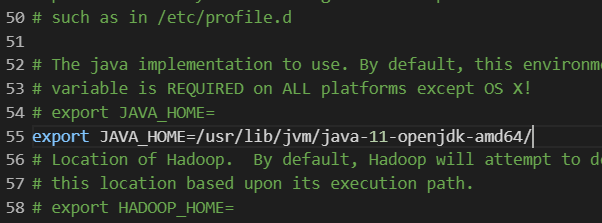

#Execução do Hadoop:

Executa o comando !/usr/local/hadoop-3.3.6/bin/hadoop, que imprime informações sobre o uso do Hadoop e suas subcomandos disponíveis.

In [5]:
!/usr/local/hadoop-3.3.6/bin/hadoop

Usage: hadoop [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    hadoop [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

buildpaths                       attempt to add class files from build tree
--config dir                     Hadoop config directory
--debug                          turn on shell script debug mode
--help                           usage information
hostnames list[,of,host,names]   hosts to use in worker mode
hosts filename                   list of hosts to use in worker mode
loglevel level                   set the log4j level for this command
workers                          turn on worker mode

  SUBCOMMAND is one of:


    Admin Commands:

daemonlog     get/set the log level for each daemon

    Client Commands:

archive       create a Hadoop archive
checknative   check native Hadoop and compression libraries availability
classpath     prints the class path needed to get the Hadoop jar and the re

# Preparação do Diretório de Entrada:

- Cria um diretório chamado input usando o comando mkdir.
- Copia todos os arquivos XML de configuração do Hadoop para o diretório input usando o comando cp.
- Lista os arquivos no diretório input usando o comando ls.

In [6]:
!mkdir ~/input
!cp /usr/local/hadoop-3.3.6/etc/hadoop/*.xml ~/input

In [7]:
!ls ~/input

capacity-scheduler.xml	hadoop-policy.xml  hdfs-site.xml    kms-acls.xml  mapred-site.xml
core-site.xml		hdfs-rbf-site.xml  httpfs-site.xml  kms-site.xml  yarn-site.xml


#Execução de um Exemplo de MapReduce:

- Executa um comando MapReduce usando o Hadoop para realizar uma operação de "grep" (procurar por padrões em arquivos) em arquivos no diretório input.
- O comando utiliza o JAR de exemplo hadoop-mapreduce-examples-3.3.0.jar.
- O padrão a ser procurado é 'allowed[.]*'.
- Exibe o conteúdo dos arquivos resultantes usando cat.

In [8]:
!/usr/local/hadoop-3.3.6/bin/hadoop jar /usr/local/hadoop-3.3.6/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.3.6.jar grep ~/input ~/grep_example 'allowed[.]*'

2024-03-13 10:14:57,281 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-03-13 10:14:57,579 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-03-13 10:14:57,579 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-03-13 10:14:58,062 INFO input.FileInputFormat: Total input files to process : 10
2024-03-13 10:14:58,116 INFO mapreduce.JobSubmitter: number of splits:10
2024-03-13 10:14:58,590 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local1850811072_0001
2024-03-13 10:14:58,590 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-03-13 10:14:58,946 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2024-03-13 10:14:58,948 INFO mapreduce.Job: Running job: job_local1850811072_0001
2024-03-13 10:14:58,960 INFO mapred.LocalJobRunner: OutputCommitter set in config null
2024-03-13 10:14:58,973 INFO output.PathOutputCommitterFactory: No output committer factory defined, defau

A saída final mostra que foram encontradas duas instâncias do padrão 'allowed[.]*' nos arquivos de exemplo, com as respectivas contagens.

In [9]:
!cat ~/grep_example/*

22	allowed.
1	allowed


#Exemplo 1: Contagem de Palavras

In [10]:
# Criando o arquivo de texto
with open("texto.txt", "w") as file:
    file.write("Olá, este é uma exemplo de uso do MapReduce com Hadoop em Python.\n")
    file.write("MapReduce é um modelo de programação para processamento e geração em dataset de grande escala.\n")
    file.write("Consiste em dois passos: Map e Reduce.\n")
    file.write("Este exemplo mostra um basico contador de palavras usando MapReduce.")

# MapReduce em Python (contagem de palavras):

In [11]:
pip install mrjob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 3.1 MB/s eta 0:00:00


In [15]:
!python palavra_contada.py -r local texto.txt

No configs found; falling back on auto-configuration
No configs specified for local runner
Creating temp directory /tmp/palavra_contada.root.20240313.102752.336323
Running step 1 of 1...
job output is in /tmp/palavra_contada.root.20240313.102752.336323/output
Streaming final output from /tmp/palavra_contada.root.20240313.102752.336323/output...
"e"	2
"em"	3
"escala."	1
"este"	2
"exemplo"	2
"gera\u00e7\u00e3o"	1
"grande"	1
"hadoop"	1
"map"	1
"mapreduce"	2
"mapreduce."	1
"modelo"	1
"mostra"	1
"ol\u00e1,"	1
"palavras"	1
"para"	1
"passos:"	1
"processamento"	1
"programa\u00e7\u00e3o"	1
"python."	1
"reduce."	1
"um"	2
"uma"	1
"usando"	1
"uso"	1
"\u00e9"	2
"basico"	1
"com"	1
"consiste"	1
"contador"	1
"dataset"	1
"de"	4
"do"	1
"dois"	1
Removing temp directory /tmp/palavra_contada.root.20240313.102752.336323...


Agora usando o Hadoop

In [22]:
!python palavra_contada.py -r hadoop hdfs:///texto.txt

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in $PATH...
Falling back to 'hadoop'
Traceback (most recent call last):
  File "/content/palavra_contada.py", line 15, in <module>
    MRWordCount.run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 616, in run
    cls().execute()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 687, in execute
    self.run_job()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/job.py", line 636, in run_job
    runner.run()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/runner.py", line 500, in run
    self._check_input_paths()
  File "/usr/local/lib/python3.10/dist-packages/mrjob/runner.py", line 1133, in _check_input_paths
    self._check_input_path(path)
  File "/usr/local/lib/python3.10/dist-packages/mrjob/runner.py", line 1145, in _check_input_path
    if not self.fs.exists(path):
  File "/usr/local/lib/python3.10/dist-packages/m